# Animate a Map
Animate a simulated map over time for a single channel and single heating frequency.

In [1]:
import os
import sys
import glob

import numpy as np
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt
from sunpy.map import Map
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize,AsinhStretch,SqrtStretch
from IPython.display import HTML

sys.path.append('../paper')
from formatting import get_figsize

matplotlib.rc_file('../paper/matplotlibrc')

import warnings
warnings.filterwarnings('ignore',category=UserWarning,)

%matplotlib inline

In [92]:
fits_files = sorted(glob.glob('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/SDO_AIA/193/*.fits'))

In [93]:
clipped_fits_files = fits_files[500:2501:3]

Text(224.446,232.74,'$193\\,\\,\\mathrm{\\AA}$')

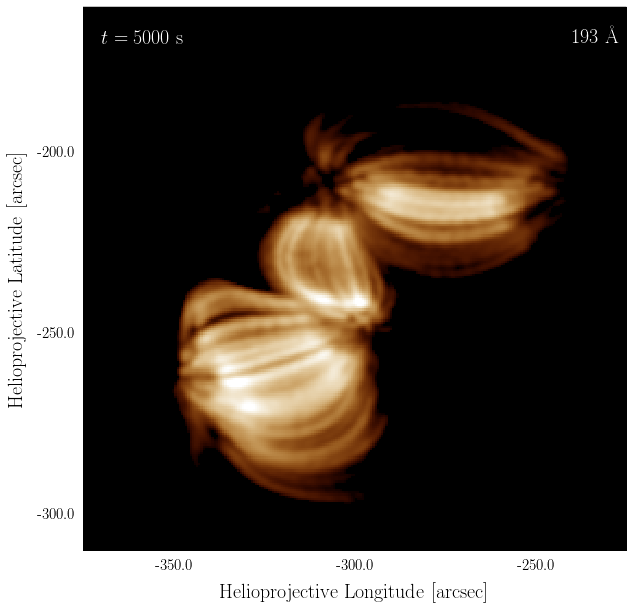

In [94]:
fig = plt.figure(figsize=(10,10))
m = Map(clipped_fits_files[0])
blc = SkyCoord(Tx=-375*u.arcsec,Ty=-310*u.arcsec,frame=m.coordinate_frame)
trc = SkyCoord(Tx=-225*u.arcsec,Ty=-160*u.arcsec,frame=m.coordinate_frame)
m = m.submap(blc,trc)
ax = fig.gca(projection=m)
norm = ImageNormalize(vmin=50,vmax=1200,stretch=AsinhStretch())
im = m.plot(axes=ax,title=False,annotate=False,norm=norm)
ax.grid(alpha=0)
lon,lat = ax.coords
lon.set_axislabel('Helioprojective Longitude [arcsec]', fontsize=20)
lat.set_axislabel('Helioprojective Latitude [arcsec]', fontsize=20)
lon.set_ticklabel(fontsize=15)
lat.set_ticklabel(fontsize=15)
xpix,ypix = m.world_to_pixel(
    SkyCoord(Tx=-370*u.arcsec,Ty=-170*u.arcsec,frame=m.coordinate_frame)
)
time_text = ax.text(xpix.value,ypix.value,f'$t={m.meta["t_obs"]:.0f}$ s',color='w',fontsize=20)
xpix,ypix = m.world_to_pixel(
    SkyCoord(Tx=-240*u.arcsec,Ty=-170*u.arcsec,frame=m.coordinate_frame)
)
ax.text(xpix.value,ypix.value,f'${m.meta["wavelnth"]:.0f}\,\,\mathrm{{\AA}}$',color='w',fontsize=20)

In [95]:
def update_fig(i):
    m = Map(clipped_fits_files[i]).submap(blc,trc)
    im.set_data(m.data)
    time_text.set_text(f'$t={m.meta["t_obs"]:.0f}$ s')
    return im,time_text

In [96]:
interval = 30/len(clipped_fits_files)*1e3

In [97]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    update_fig,
    frames=len(clipped_fits_files),
    interval=interval,
    blit=True,
    repeat=True,
)

In [98]:
ani.save(f'noaa11158_aia{m.meta["wavelnth"]:.0f}.mp4',dpi=85)